# importing the libraries


In [14]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime


# read dataset

In [78]:
df=pd.read_csv("c:\\EOD-AAPL.csv")
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2017-12-28,171.00,171.850,170.480,171.080,16480187.0,0.0,1.0,41.136972,41.341454,41.011877,41.156217,65920748.0
2017-12-27,170.10,170.780,169.710,170.600,21498213.0,0.0,1.0,40.920461,41.084047,40.826640,41.040745,85992852.0
2017-12-26,170.80,171.470,169.679,170.570,33185536.0,0.0,1.0,41.088858,41.250038,40.819183,41.033528,132742144.0
2017-12-22,174.68,175.424,174.500,175.010,16349444.0,0.0,1.0,42.022259,42.201241,41.978957,42.101646,65397776.0
2017-12-21,174.17,176.020,174.100,175.010,20949896.0,0.0,1.0,41.899570,42.344619,41.882730,42.101646,83799584.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09-09,505.00,507.920,503.480,506.170,12167400.0,0.0,1.0,15.996600,16.089095,15.948451,16.033661,340687200.0
2013-09-06,498.44,499.380,489.950,498.220,12840200.0,0.0,1.0,15.788802,15.818578,15.519869,15.781833,359525600.0
2013-09-05,500.25,500.680,493.640,495.270,8441700.0,0.0,1.0,15.846136,15.859757,15.636755,15.688388,236367600.0


# Data cleaning and feature engineering

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1090 entries, 2017-12-28 to 2013-09-03
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        1090 non-null   float64
 1   High        1090 non-null   float64
 2   Low         1090 non-null   float64
 3   Close       1090 non-null   float64
 4   Volume      1090 non-null   float64
 5   Dividend    1090 non-null   float64
 6   Split       1090 non-null   float64
 7   Adj_Open    1090 non-null   float64
 8   Adj_High    1090 non-null   float64
 9   Adj_Low     1090 non-null   float64
 10  Adj_Close   1090 non-null   float64
 11  Adj_Volume  1090 non-null   float64
dtypes: float64(12)
memory usage: 110.7+ KB


<AxesSubplot:xlabel='Date'>

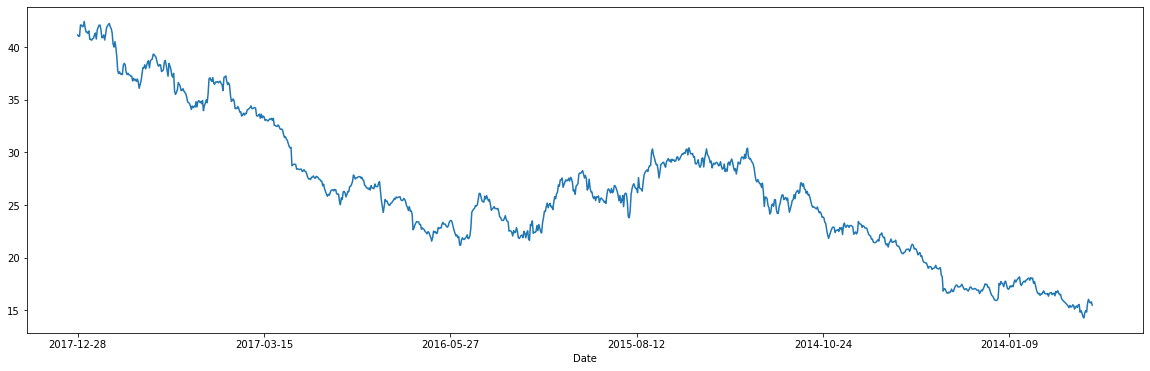

In [83]:
df['Adj_Close'].plot(figsize=(20,6))

In [84]:
df.isnull().sum()

Open          0
High          0
Low           0
Close         0
Volume        0
Dividend      0
Split         0
Adj_Open      0
Adj_High      0
Adj_Low       0
Adj_Close     0
Adj_Volume    0
dtype: int64

In [85]:
df['HL_PCT']= ((df['Adj_High']-df['Adj_Low'])*100)/(df['Adj_Close'])
df['HL_PCT']

Date
2017-12-28    0.800795
2017-12-27    0.627198
2017-12-26    1.050009
2017-12-22    0.527970
2017-12-21    1.097080
                ...   
2013-09-09    0.877176
2013-09-06    1.892738
2013-09-05    1.421447
2013-09-04    1.195129
2013-09-03    2.711941
Name: HL_PCT, Length: 1090, dtype: float64

In [26]:
df['PCT_change']= ((df['Adj_Close']-df['Adj_Open'])*100)/(df['Adj_Open'])
df['PCT_change']

Date
2017-12-28    0.046784
2017-12-27    0.293945
2017-12-26   -0.134660
2017-12-22    0.188917
2017-12-21    0.482287
                ...   
2013-09-09    0.231683
2013-09-06   -0.044138
2013-09-05   -0.995502
2013-09-04   -0.173953
2013-09-03   -0.916650
Name: PCT_change, Length: 1090, dtype: float64

In [34]:
df1=df.drop(['Open','High','Low','Close','Volume','Dividend','Split'], axis='columns')
df1

,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,,,,
2017-12-28,41.136972,41.341454,41.011877,41.156217,65920748.0,0.800795,0.046784
2017-12-27,40.920461,41.084047,40.826640,41.040745,85992852.0,0.627198,0.293945
2017-12-26,41.088858,41.250038,40.819183,41.033528,132742144.0,1.050009,-0.134660
2017-12-22,42.022259,42.201241,41.978957,42.101646,65397776.0,0.527970,0.188917
2017-12-21,41.899570,42.344619,41.882730,42.101646,83799584.0,1.097080,0.482287
...,...,...,...,...,...,...,...
2013-09-09,15.996600,16.089095,15.948451,16.033661,340687200.0,0.877176,0.231683
2013-09-06,15.788802,15.818578,15.519869,15.781833,359525600.0,1.892738,-0.044138
2013-09-05,15.846136,15.859757,15.636755,15.688388,236367600.0,1.421447,-0.995502


In [35]:
df2=df1.drop(['Adj_Open','Adj_High','Adj_Low'], axis='columns')
df2

,Adj_Close,Adj_Volume,HL_PCT,PCT_change
Date,,,,
2017-12-28,41.156217,65920748.0,0.800795,0.046784
2017-12-27,41.040745,85992852.0,0.627198,0.293945
2017-12-26,41.033528,132742144.0,1.050009,-0.134660
2017-12-22,42.101646,65397776.0,0.527970,0.188917
2017-12-21,42.101646,83799584.0,1.097080,0.482287
...,...,...,...,...
2013-09-09,16.033661,340687200.0,0.877176,0.231683
2013-09-06,15.781833,359525600.0,1.892738,-0.044138
2013-09-05,15.688388,236367600.0,1.421447,-0.995502


In [36]:
df2.isnull().sum()

Adj_Close     0
Adj_Volume    0
HL_PCT        0
PCT_change    0
dtype: int64

In [37]:
df2["PCT_change"].unique()

array([ 0.04678363,  0.29394474, -0.13466042, ..., -0.99550225,
       -0.17395308, -0.91664977])

In [38]:
df2['Label']=df['Adj_Close'].shift(-1)

In [39]:
df2

,Adj_Close,Adj_Volume,HL_PCT,PCT_change,Label
Date,,,,,
2017-12-28,41.156217,65920748.0,0.800795,0.046784,41.040745
2017-12-27,41.040745,85992852.0,0.627198,0.293945,41.033528
2017-12-26,41.033528,132742144.0,1.050009,-0.134660,42.101646
2017-12-22,42.101646,65397776.0,0.527970,0.188917,42.101646
2017-12-21,42.101646,83799584.0,1.097080,0.482287,41.942872
...,...,...,...,...,...
2013-09-09,16.033661,340687200.0,0.877176,0.231683,15.781833
2013-09-06,15.781833,359525600.0,1.892738,-0.044138,15.688388
2013-09-05,15.688388,236367600.0,1.421447,-0.995502,15.796753


In [41]:
df2.isnull().sum()

Adj_Close     0
Adj_Volume    0
HL_PCT        0
PCT_change    0
Label         1
dtype: int64

In [42]:
df3=df2.dropna()
df3

,Adj_Close,Adj_Volume,HL_PCT,PCT_change,Label
Date,,,,,
2017-12-28,41.156217,65920748.0,0.800795,0.046784,41.040745
2017-12-27,41.040745,85992852.0,0.627198,0.293945,41.033528
2017-12-26,41.033528,132742144.0,1.050009,-0.134660,42.101646
2017-12-22,42.101646,65397776.0,0.527970,0.188917,42.101646
2017-12-21,42.101646,83799584.0,1.097080,0.482287,41.942872
...,...,...,...,...,...
2013-09-10,15.668432,743195600.0,3.628902,-2.283682,16.033661
2013-09-09,16.033661,340687200.0,0.877176,0.231683,15.781833
2013-09-06,15.781833,359525600.0,1.892738,-0.044138,15.688388


In [49]:
x=np.array(df3.drop(['Label'],axis='columns'))
x

array([[ 4.11562172e+01,  6.59207480e+07,  8.00794950e-01,
         4.67836257e-02],
       [ 4.10407450e+01,  8.59928520e+07,  6.27198124e-01,
         2.93944738e-01],
       [ 4.10335280e+01,  1.32742144e+08,  1.05000879e+00,
        -1.34660422e-01],
       ...,
       [ 1.57818333e+01,  3.59525600e+08,  1.89273815e+00,
        -4.41377097e-02],
       [ 1.56883878e+01,  2.36367600e+08,  1.42144689e+00,
        -9.95502249e-01],
       [ 1.57967529e+01,  3.45032800e+08,  1.19512885e+00,
        -1.73953079e-01]])

In [52]:
y=np.array(df3.Label)
y

array([41.04074503, 41.03352802, 42.10164588, ..., 15.68838781,
       15.79675289, 15.47647246])

# Scaling

In [59]:
from sklearn import preprocessing

In [60]:
x=preprocessing.scale(x)

In [61]:
x

array([[ 2.23555711, -1.14275476, -0.87212901,  0.01667143],
       [ 2.21808304, -0.96226574, -1.05072821,  0.23216641],
       [ 2.21699091, -0.54189456, -0.6157338 , -0.14152611],
       ...,
       [-1.60427412,  1.49734976,  0.2512797 , -0.06260111],
       [-1.61841495,  0.38990896, -0.23359232, -0.89207739],
       [-1.60201638,  1.36703002, -0.46643196, -0.17578461]])

# Training and testing the data

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [63]:
len(x_train)

871

In [64]:
len(x_test)

218

In [65]:
len(x)

1089

# Creating linear regression model object

In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [67]:
model.fit(x_train,y_train)

LinearRegression()

In [72]:
y_pred=model.predict(x_test)
y_pred

array([22.36568106, 16.03740286, 25.51570967, 23.57450283, 37.53297986,
       26.85502787, 23.75844445, 22.17457326, 37.61045557, 36.38756151,
       29.19159605, 41.22328841, 24.47425173, 34.32056663, 39.62829405,
       25.54227382, 21.59042703, 41.73286545, 15.79329803, 21.48525454,
       34.18432762, 24.55242237, 41.16342069, 20.9301547 , 36.58364008,
       29.24538818, 22.73143993, 21.83712845, 21.21716722, 38.71469309,
       27.69456923, 32.17147285, 24.29004715, 25.13494029, 16.44141778,
       22.62513545, 22.81422867, 17.66752746, 26.69889088, 17.0889777 ,
       22.80360722, 36.76128038, 40.83761519, 38.3100166 , 35.98864734,
       22.17466725, 34.10559118, 27.49104517, 23.24851355, 26.75330901,
       23.05552811, 34.20641158, 37.44035585, 27.35728244, 24.88974031,
       21.06402339, 25.28292583, 34.1920625 , 26.75391544, 29.5982289 ,
       21.84469105, 22.47128661, 14.84044866, 26.94683517, 26.30634628,
       24.56593759, 38.49041293, 24.88683884, 16.07080356, 22.48

# Testing model

In [73]:
model.score(x_test,y_test)

0.9984235114915393

In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [75]:
mse = mean_squared_error(y_test, y_pred)
mse 

0.07250439927514772

In [76]:
r2=r2_score(y_test,y_pred)
r2

0.9984235114915393